# Banking Predictions with Linear Regression
### - Predicts the account balance of a customer in a bank

- [x] Data Cleaning
- [x] Data Exploration
- [x] Data Visualization
- [x] Feature Engineering
- [x] Model Building
- [x] Model Evaluation

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.insert(0, "utils.py")

import utils

## Read the checkings account data from the csv file

In [2]:
data_folder = "Chase_Banking_Transactions"
data_folder = "Bank_Data"
df_checkings = utils.combine_dfs(data_folder, "checkings.csv")
df_checkings = df_checkings.rename(columns={"Posting Date": "Date"})
df_checkings = df_checkings.set_index("Date")
df_checkings.index = pd.to_datetime(df_checkings.index)

### Inspect the data

In [3]:
df_checkings.head()

,Details,Amount,Type,Balance,Check or Slip #
Date,,,,,
2010-01-01,DEBIT,-79.0,DEBIT_CARD,813.46,NaN
2010-01-02,DEBIT,-799.0,ACCT_XFER,13.46,NaN
2010-01-03,DEBIT,-799.0,ACCT_XFER,13.46,NaN
2010-01-04,DEBIT,-799.0,ACCT_XFER,13.46,NaN
2010-01-05,DEBIT,-799.0,ACCT_XFER,13.46,NaN


### Plot the data

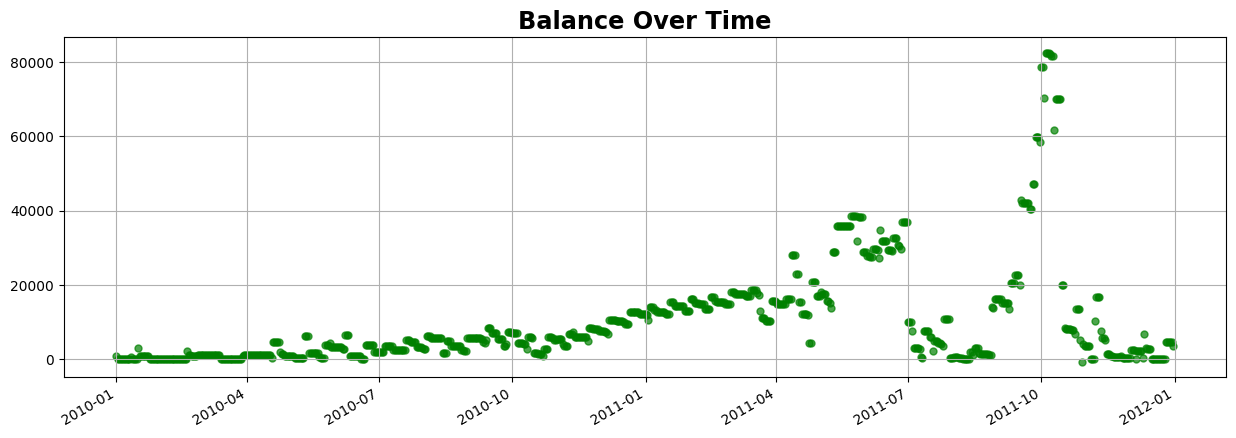

In [4]:
utils.graph_checkings(df_checkings)

# Data Cleaning

### Drop all unnecessary columns

In [5]:
balance_df = df_checkings.drop(columns=["Amount", "Details", "Type", "Check or Slip #"])
balance_df.head()

,Balance
Date,
2010-01-01,813.46
2010-01-02,13.46
2010-01-03,13.46
2010-01-04,13.46
2010-01-05,13.46


### Notice the multiple data points on the same day
- If there are multiple transactions on the same day, the balance will be recorded multiple times

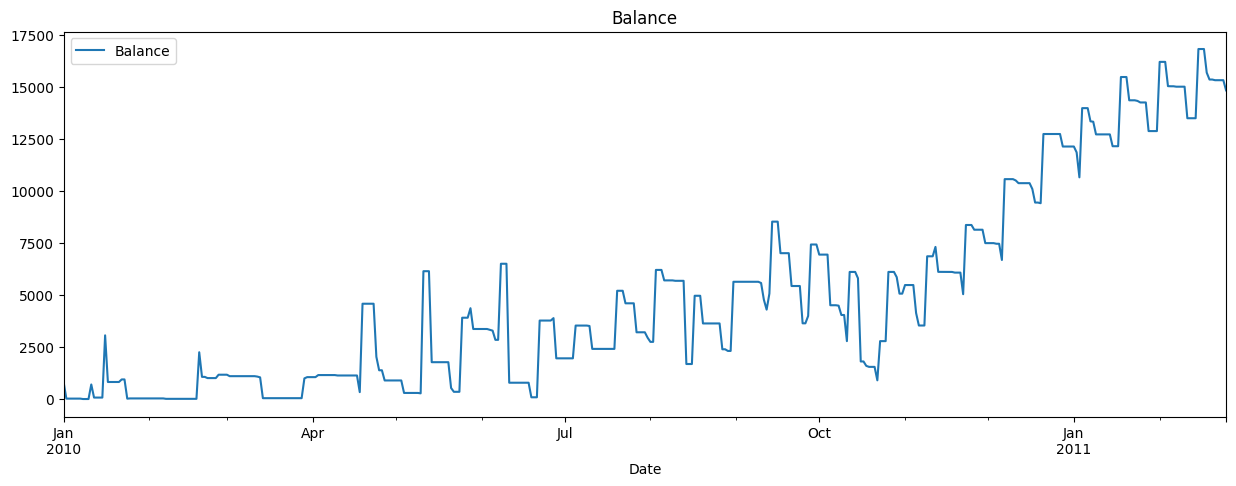

In [6]:
# Limit the amount of data to train and test on in order to make it more reliable.
# This is not always necessary, but I'm choosing this because the last year or so
# of data is erratic and not representative of the overall trend.
end_date = balance_df.index[420]
balance_df = balance_df.loc[:end_date].copy()
balance_df.plot(figsize=(15, 5), title="Balance")
plt.show()

## Get the training and testing set of data

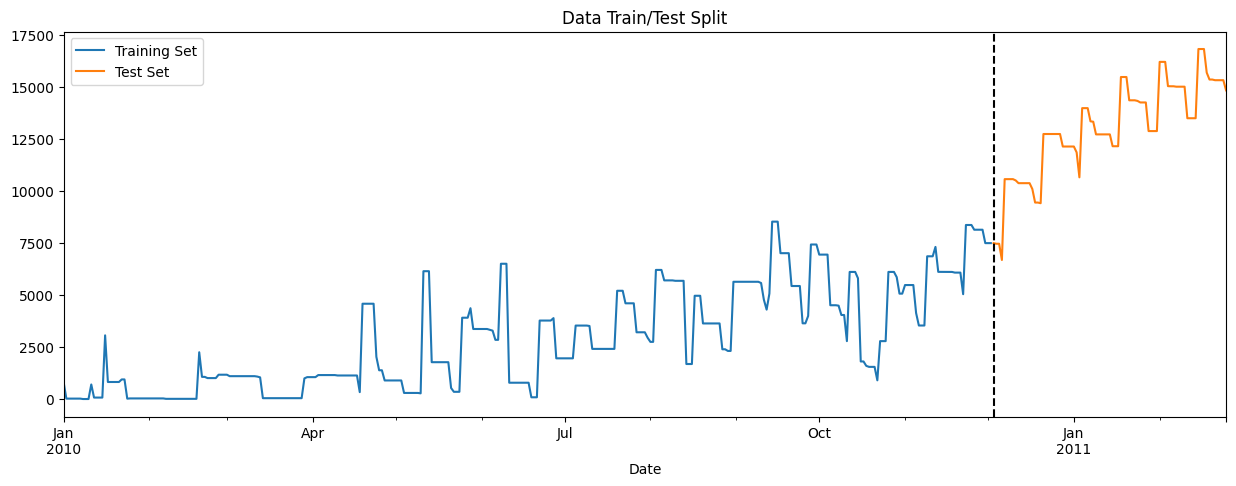

In [7]:
train_data, test_data = utils.train_test_split_01(balance_df)
X_train, y_train, X_test, y_test = utils.train_test_split_02(
    train_data, test_data, "Date", "Balance"
)
utils.plot_train_test_split(train_data, test_data)

### Plot regression line through training data to see the trend

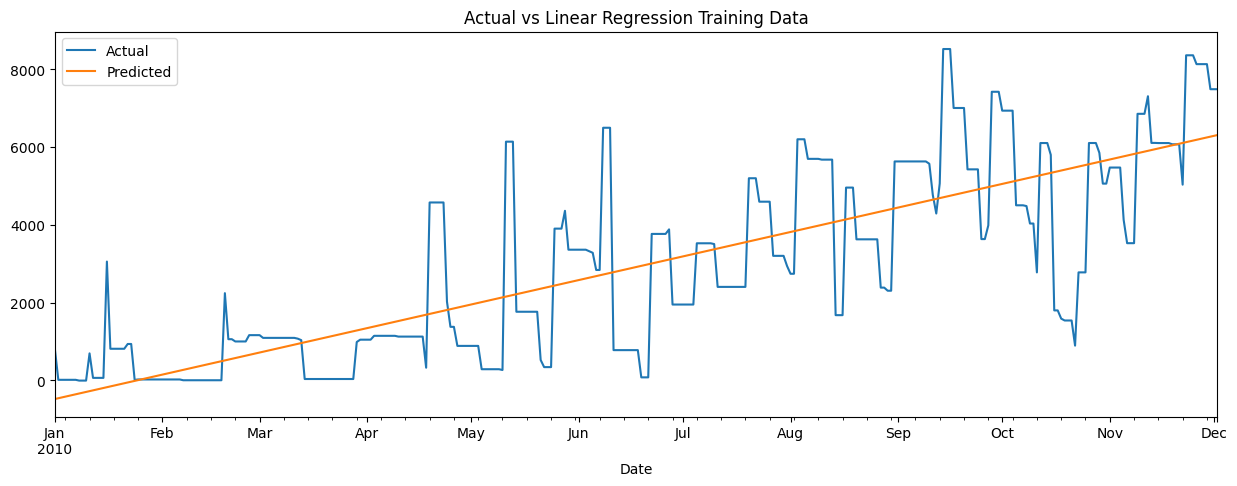

Mean Squared Error (MSE): 2190844.0841175197
Root Mean Squared Error (RMSE): 1480.15002081462
Mean Absolute Error (MAE): 1133.5585328475718
R-squared (R2) Score: 0.6381289699514634


In [8]:
utils.plot_train_data_with_regression(
    train_data, "Date", "Balance", regression_type="lr", eval_model=True
)

### Plot the prediction

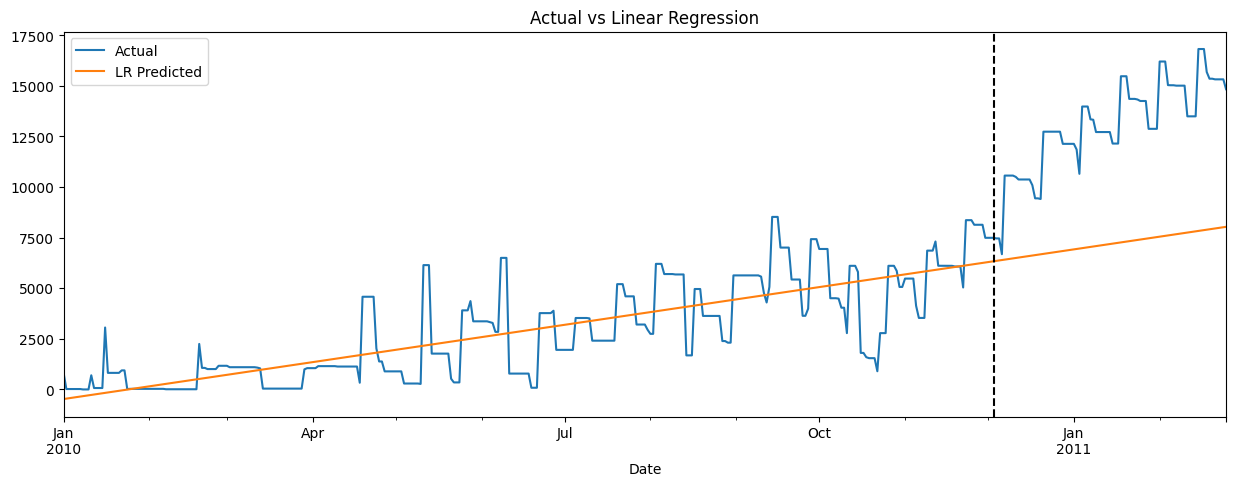

Mean Squared Error (MSE): 37266358.63238814
Root Mean Squared Error (RMSE): 6104.617812147468
Mean Absolute Error (MAE): 5813.437763623465
R-squared (R2) Score: -6.240722789901945


In [9]:
y_pred = utils.get_y_pred(X_train, y_train, X_test, regression_type="lr")
utils.plot_all_data_with_entire_regression_line(
    balance_df, "Date", "Balance", regression_type="lr", eval_model=True
)

## Prediction isn't good, lets see if we can do better
- Take a rolling average of the data
- Plot the rolling average of the Balance alongside the actual Balance
- Plot the regression line through the rolling average data
- Plot the prediction

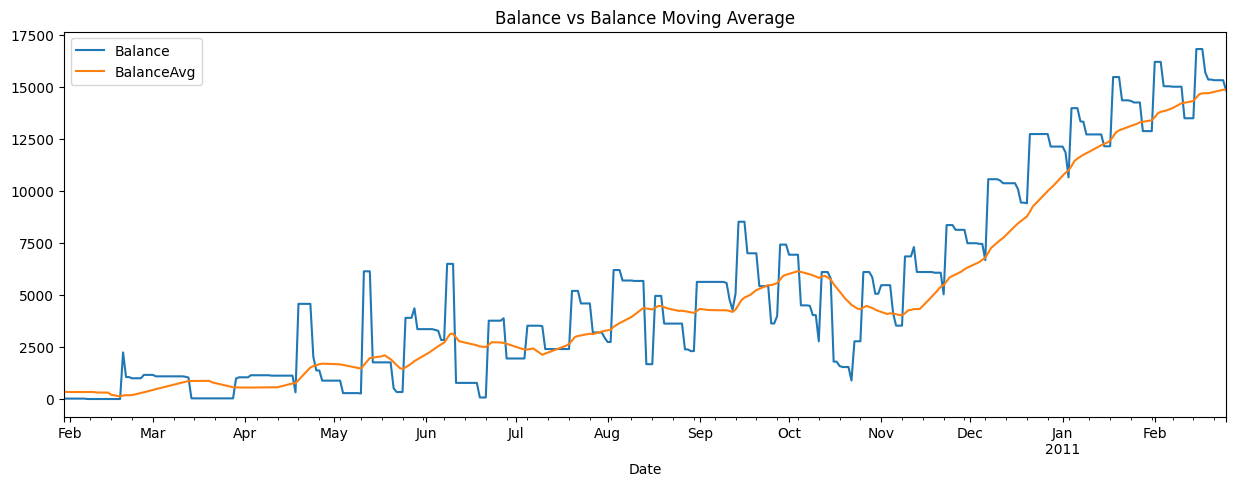

In [10]:
# Take the rolling mean of the two columns
window = 30

balance_df["BalanceAvg"] = balance_df["Balance"].rolling(window).mean()

# get the first date where BalanceAvg is not null
bal_avg_df = balance_df[balance_df["BalanceAvg"].notnull()]

# plot the avg columns
fig, ax = plt.subplots(figsize=(15, 5))
bal_avg_df.plot(ax=ax, label="Balance", title="Balance vs Balance Moving Average")
plt.show()

# Plot regression line through the rolling average data

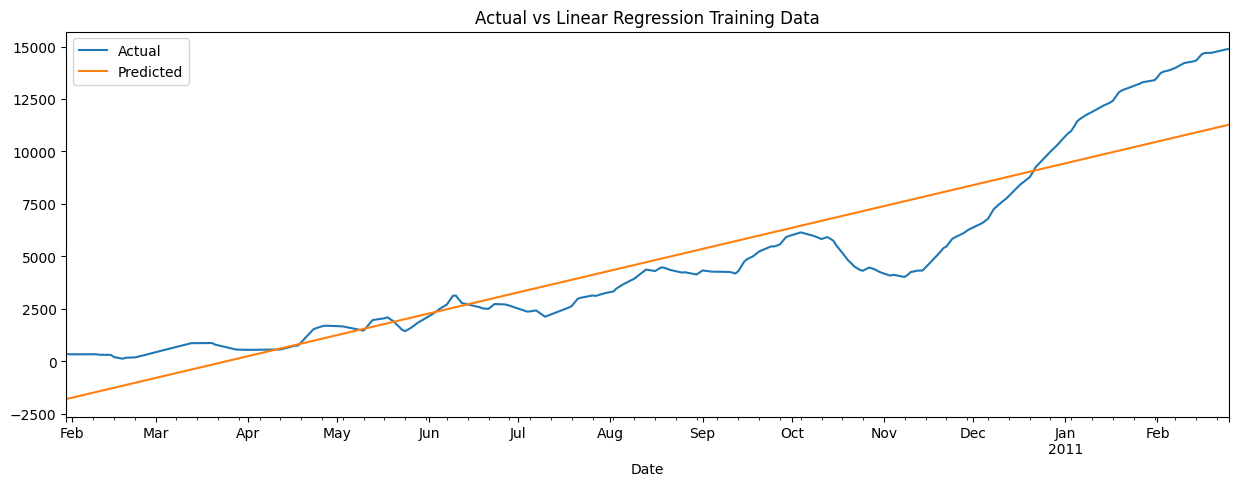

Mean Squared Error (MSE): 2878326.6284816964
Root Mean Squared Error (RMSE): 1696.5631813998841
Mean Absolute Error (MAE): 1326.7669425921586
R-squared (R2) Score: 0.8324196703709931


In [11]:
utils.plot_train_data_with_regression(
    bal_avg_df,
    X_column_name="Date",
    y_column_name="BalanceAvg",
    eval_model=True,
)

# Apply Train Test Split for the rolling average data

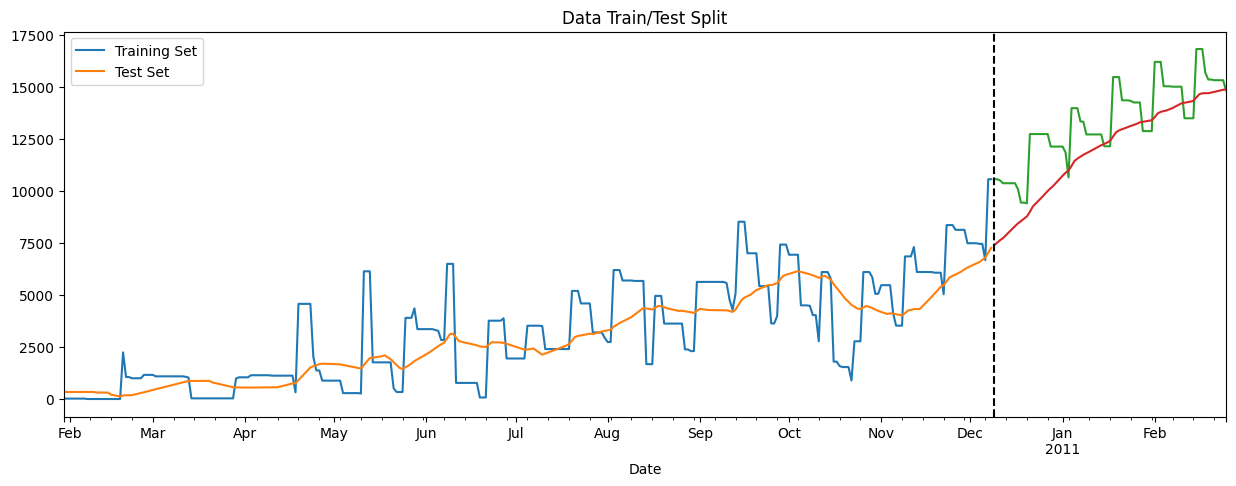

In [12]:
train_data, test_data = utils.train_test_split_01(bal_avg_df)
utils.plot_train_test_split(train_data, test_data)

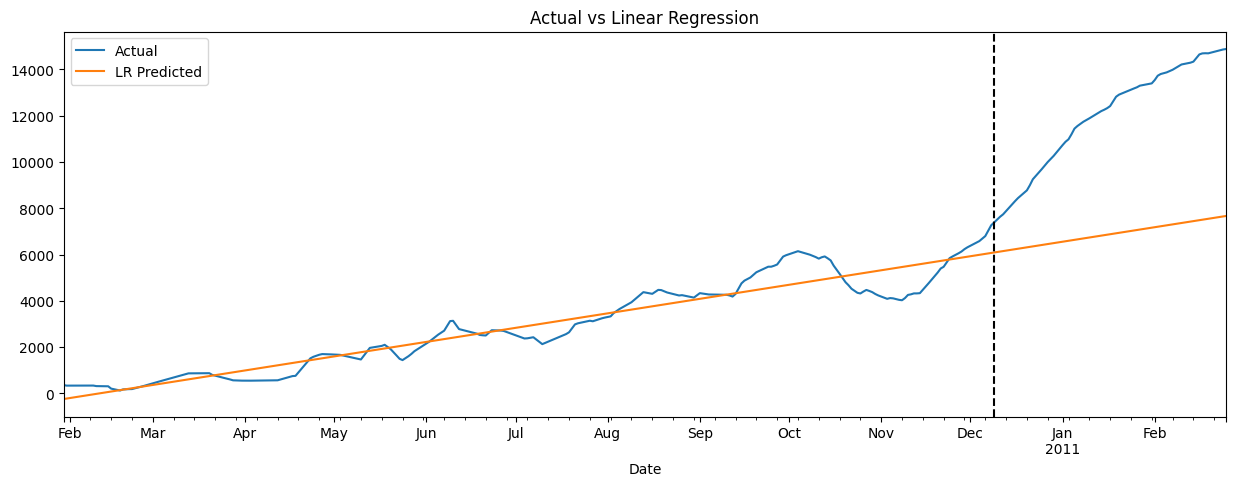

Mean Squared Error (MSE): 29292037.16930448
Root Mean Squared Error (RMSE): 5412.2118555452425
Mean Absolute Error (MAE): 5099.633037552185
R-squared (R2) Score: -4.727067175495426


In [13]:
X_train, y_train, X_test, y_test = utils.train_test_split_02(
    train_data, test_data, "Date", "BalanceAvg"
)

utils.plot_all_data_with_entire_regression_line(
    bal_avg_df, "Date", "BalanceAvg", regression_type="lr", eval_model=True
)

## As you can see, linear regression is not a good predictor for this data